In [0]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
image_dim=32

In [0]:
def parse_function(filenames):
    #print(filename , label)
    image_string  = tf.read_file(filenames)

    #dont use tf.image.decode_image , or the output shape will be undefined
    image         = tf.image.decode_png(image_string , channels = 3)

    #This will convert to float values in [0 , 1]
    image         = tf.image.convert_image_dtype(image , tf.float32)

    resized_image = tf.image.resize_images(image , [image_dim , image_dim])
    return resized_image 

def train_preprocess(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image , max_delta = 32.0/255.0)
    image = tf.image.random_saturation(image , lower = 0.5 , upper = 1.5)

    #make sure the image is still in [0 , 1]
    image = tf.clip_by_value(image , 0.0 , 1.0)
    return image 


In [0]:
def read_data(filenames):
    dataset  = tf.data.Dataset.from_tensor_slices((filenames))
    dataset  = dataset.map(parse_function)
    dataset  = dataset.map(train_preprocess)

    iterator = dataset.make_one_shot_iterator()
    return iterator

In [0]:
def build_training(filenames):
    X            = np.zeros((len(filenames) , image_dim , image_dim , 3))
    iterator     = read_data(filenames)
    next_element = iterator.get_next()
    
    with tf.Session() as sess :
        for i in range (len(filenames)):
            image_example = sess.run(next_element)
            X[i , : , :]  = image_example[: , : , :]
    return X

In [14]:
filenames = ['a_1.PNG','a_2.PNG','a_3.PNG','a_4.PNG','a_5.PNG','a_6.PNG','a_7.PNG','a_8.PNG','a_9.PNG','a_10.PNG','a_11.PNG','a_12.PNG','a_13.PNG','a_14.PNG','a_15.PNG','a_16.PNG','a_17.PNG','a_18.PNG','a_19.PNG','a_20.PNG',
'b_1.PNG','b_2.PNG','b_3.PNG','b_4.PNG','b_5.PNG','b_6.PNG','b_7.PNG','b_8.PNG','b_9.PNG','b_10.PNG','b_11.PNG','b_12.PNG','b_13.PNG','b_14.PNG','b_15.PNG','b_16.PNG','b_17.PNG','b_18.PNG','b_19.PNG','b_20.PNG',
'c_1.PNG','c_2.PNG','c_3.PNG','c_4.PNG','c_5.PNG','c_6.PNG','c_7.PNG','c_8.PNG','c_9.PNG','c_10.PNG','c_11.PNG','c_12.PNG','c_13.PNG','c_14.PNG','c_15.PNG','c_16.PNG','c_17.PNG','c_18.PNG','c_19.PNG','c_20.PNG',
'd_1.PNG','d_2.PNG','d_3.PNG','d_4.PNG','d_5.PNG','d_6.PNG','d_7.PNG','d_8.PNG','d_9.PNG','d_10.PNG','d_11.PNG','d_12.PNG','d_13.PNG','d_14.PNG','d_15.PNG','d_16.PNG','d_17.PNG','d_18.PNG','d_19.PNG','d_20.PNG',
'e_1.PNG','e_2.PNG','e_3.PNG','e_4.PNG','e_5.PNG','e_6.PNG','e_7.PNG','e_8.PNG','e_9.PNG','e_10.PNG','e_11.PNG','e_12.PNG','e_13.PNG','e_14.PNG','e_15.PNG','e_16.PNG','e_17.PNG','e_18.PNG','e_19.PNG','e_20.PNG',
'f_1.PNG','f_2.PNG','f_3.PNG','f_4.PNG','f_5.PNG','f_6.PNG','f_7.PNG','f_8.PNG','f_9.PNG','f_10.PNG','f_11.PNG','f_12.PNG','f_13.PNG','f_14.PNG','f_15.PNG','f_16.PNG','f_17.PNG','f_18.PNG','f_19.PNG','f_20.PNG',
'g_1.PNG','g_2.PNG','g_3.PNG','g_4.PNG','g_5.PNG','g_6.PNG','g_7.PNG','g_8.PNG','g_9.PNG','g_10.PNG','g_11.PNG','g_12.PNG','g_13.PNG','g_14.PNG','g_15.PNG','g_16.PNG','g_17.PNG','g_18.PNG','g_19.PNG','g_20.PNG',
'h_1.PNG','h_2.PNG','h_3.PNG','h_4.PNG','h_5.PNG','h_6.PNG','h_7.PNG','h_8.PNG','h_9.PNG','h_10.PNG','h_11.PNG','h_12.PNG','h_13.PNG','h_14.PNG','h_15.PNG','h_16.PNG','h_17.PNG','h_18.PNG','h_19.PNG','h_20.PNG',
'i_1.PNG','i_2.PNG','i_3.PNG','i_4.PNG','i_5.PNG','i_6.PNG','i_7.PNG','i_8.PNG','i_9.PNG','i_10.PNG','i_11.PNG','i_12.PNG','i_13.PNG','i_14.PNG','i_15.PNG','i_16.PNG','i_17.PNG','i_18.PNG','i_19.PNG','i_20.PNG',
'j_1.PNG','j_2.PNG','j_3.PNG','j_4.PNG','j_5.PNG','j_6.PNG','j_7.PNG','j_8.PNG','j_9.PNG','j_10.PNG','j_11.PNG','j_12.PNG','j_13.PNG','j_14.PNG','j_15.PNG','j_16.PNG','j_17.PNG','j_18.PNG','j_19.PNG','j_20.PNG'
]

Y         = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                      1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                      2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
                      3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
                      4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
                      5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
                      6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
                      7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,
                      8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,
                      9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9])

X         = build_training(filenames)

model     = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(image_dim*image_dim*3 , activation = tf.nn.relu),
           
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation = tf.nn.softmax)
            ]) 

model.compile(optimizer = 'adam' ,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])
model.fit(X,Y,epochs=5000,batch_size=100)

model.summary()

model.evaluate(X,Y)

Epoch 1/5000
200/200 [==============================] - 0s 2ms/step - loss: 6.5211 - acc: 0.0900
Epoch 2/5000
200/200 [==============================] - 0s 205us/step - loss: 12.5053 - acc: 0.0950
Epoch 3/5000
200/200 [==============================] - 0s 216us/step - loss: 12.3465 - acc: 0.0850
Epoch 4/5000
200/200 [==============================] - 0s 212us/step - loss: 11.8097 - acc: 0.1050
Epoch 5/5000
200/200 [==============================] - 0s 213us/step - loss: 11.7136 - acc: 0.1250
Epoch 6/5000
200/200 [==============================] - 0s 213us/step - loss: 11.7481 - acc: 0.0700
Epoch 7/5000
200/200 [==============================] - 0s 191us/step - loss: 11.8153 - acc: 0.1000
Epoch 8/5000
200/200 [==============================] - 0s 190us/step - loss: 11.8187 - acc: 0.1000
Epoch 9/5000
200/200 [==============================] - 0s 182us/step - loss: 11.6748 - acc: 0.1250
Epoch 10/5000
200/200 [==============================] - 0s 201us/step - loss: 11.6460 - acc: 0.1250
Ep

[0.123680414929986, 1.0]

In [30]:
arr = ["a","b","c","d","e","f","g","h","i","j"]
predict = model.predict(X)

for i in range(199):
    print(arr[Y[i]],">> should be >>",arr[np.argmax(predict[i])])
    print("===================================")

('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('a', '>> should be >>', 'a')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> should be >>', 'b')
('b', '>> 

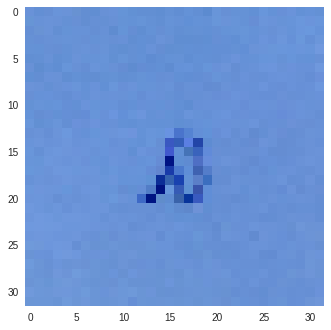

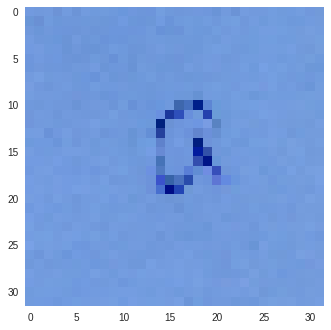

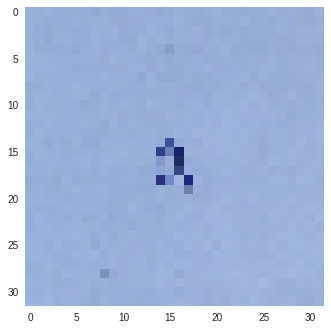

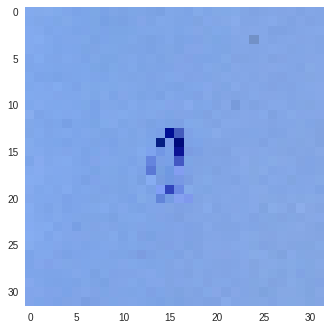

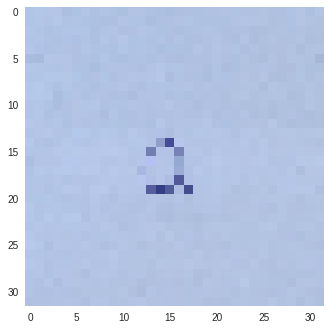

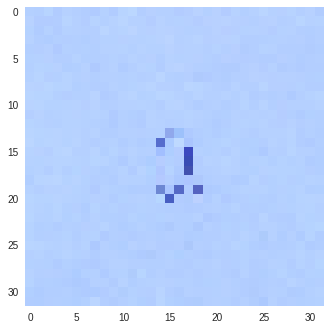

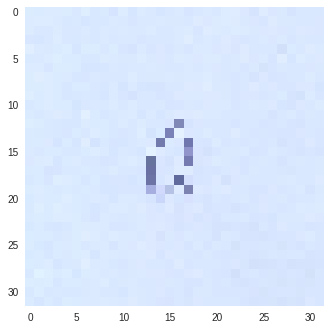

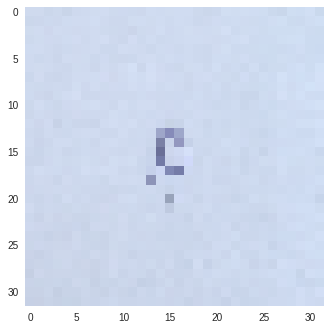

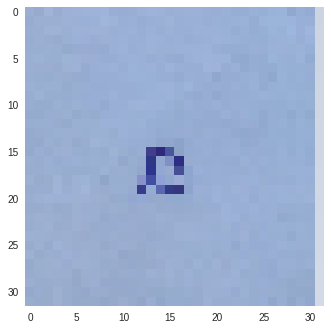

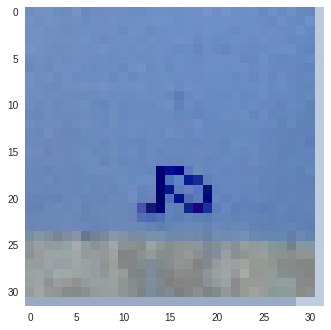

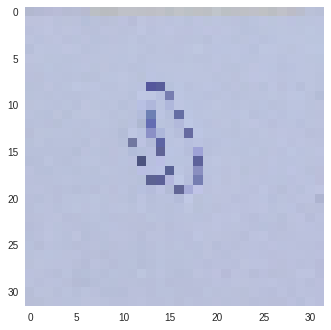

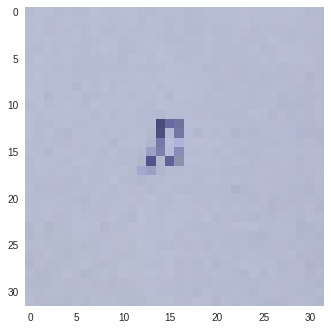

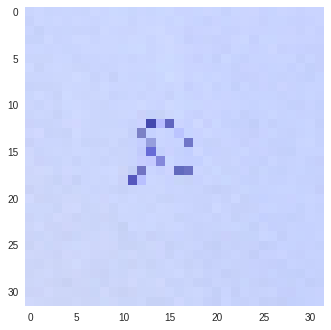

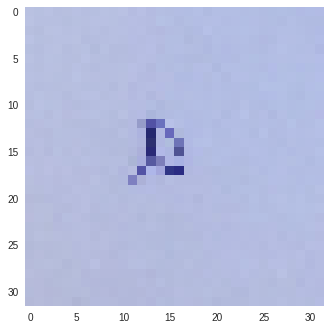

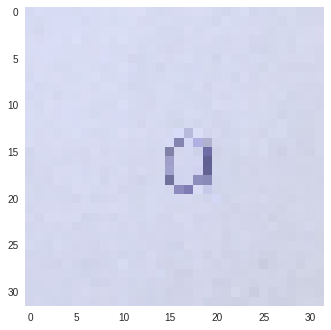

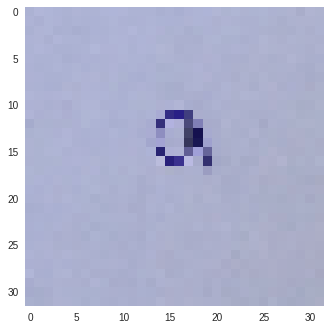

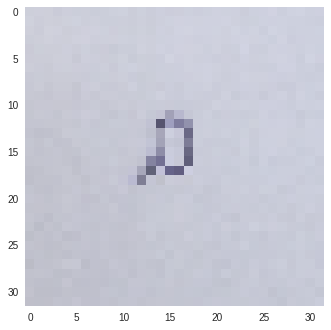

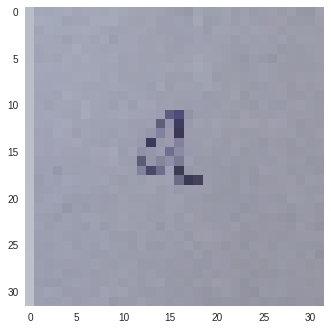

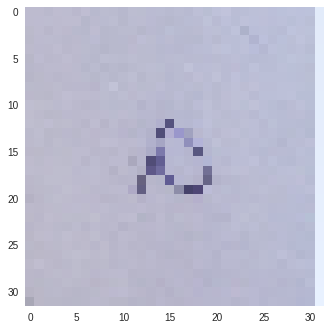

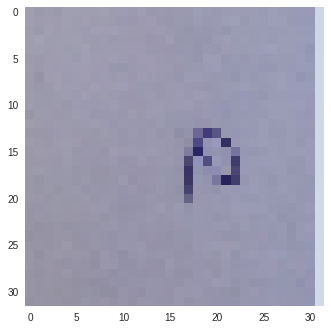

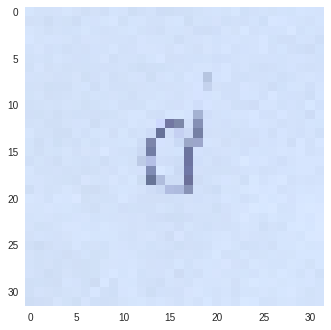

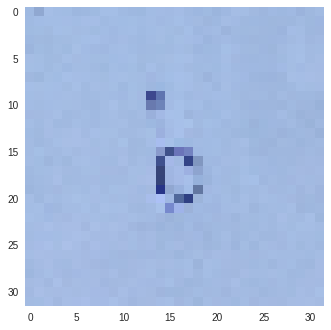

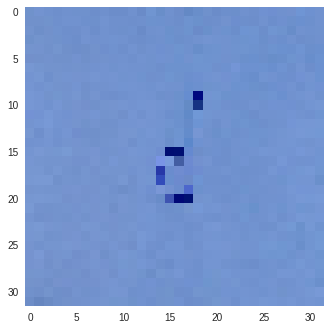

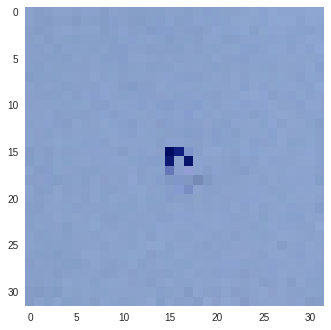

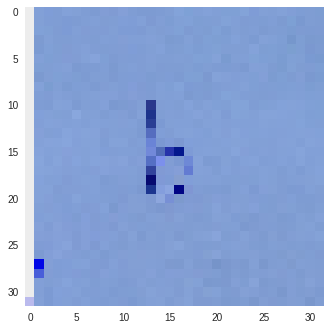

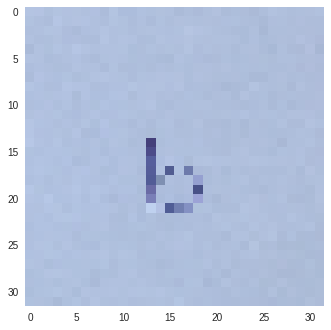

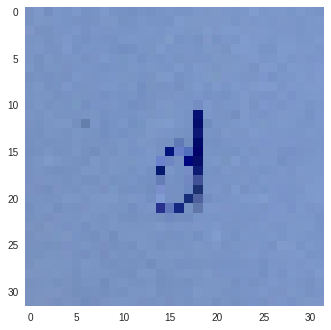

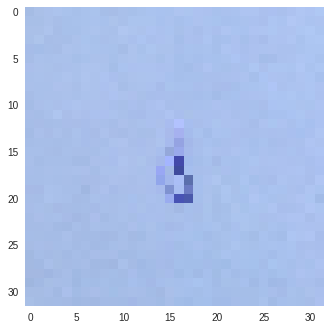

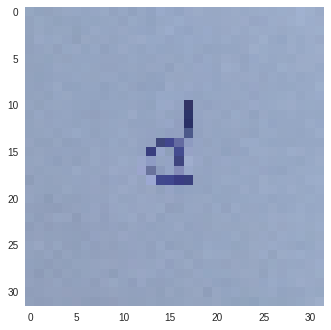

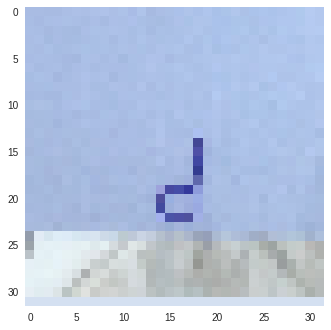

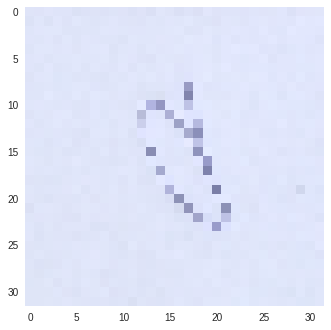

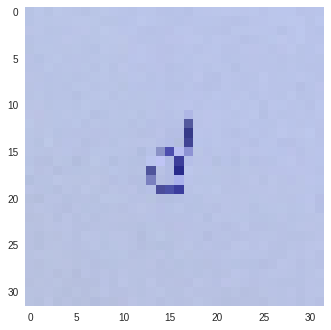

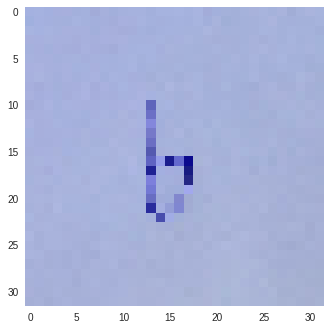

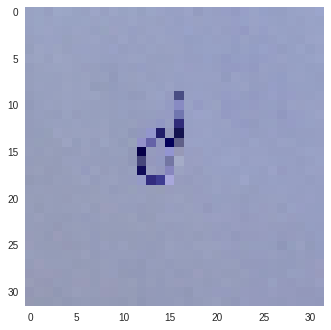

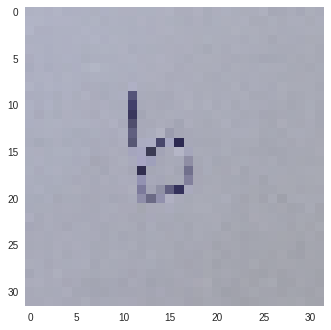

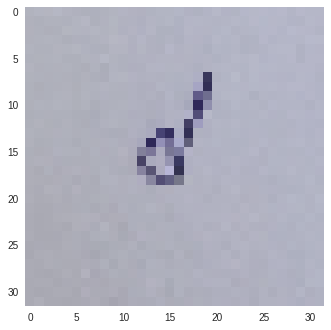

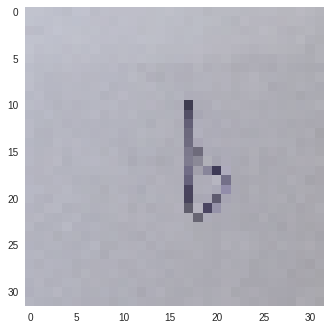

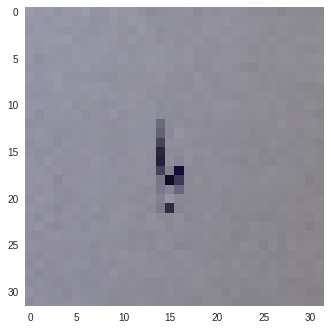

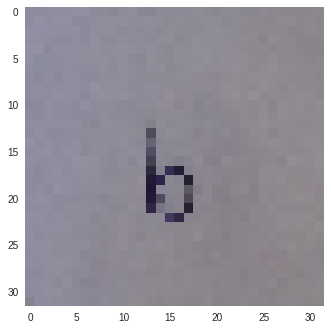

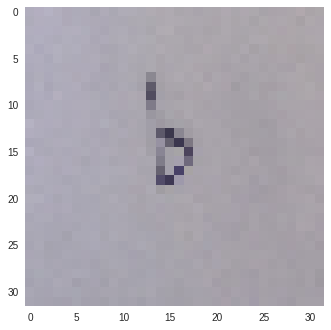

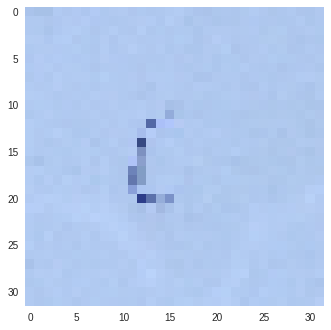

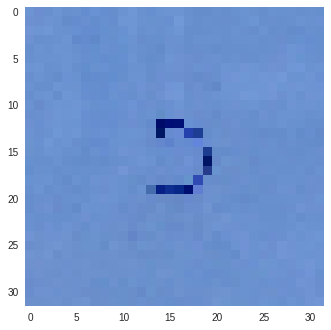

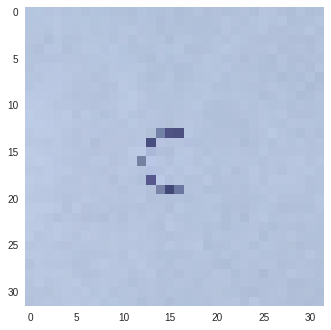

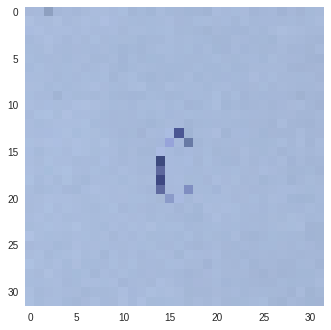

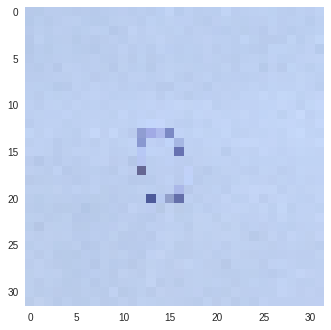

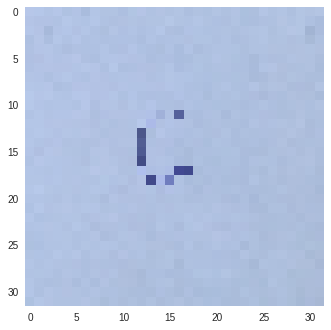

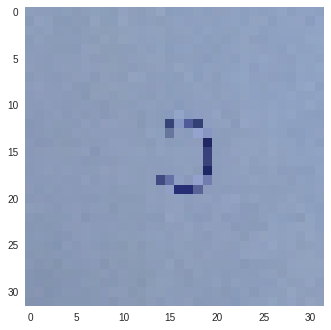

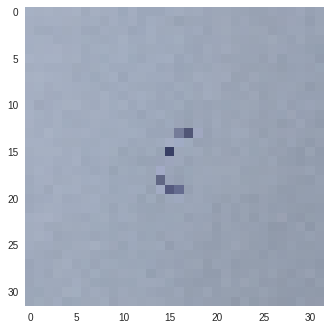

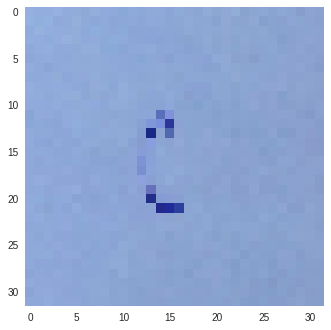

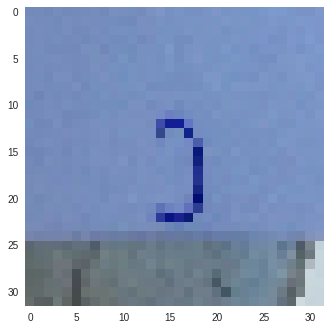

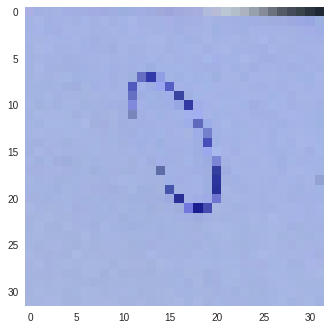

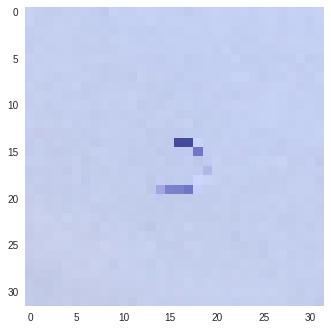

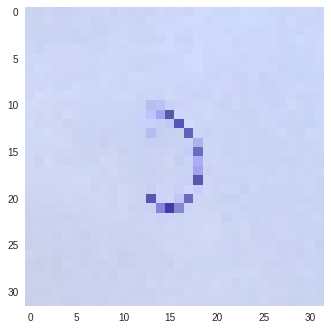

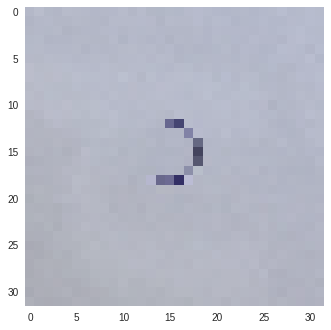

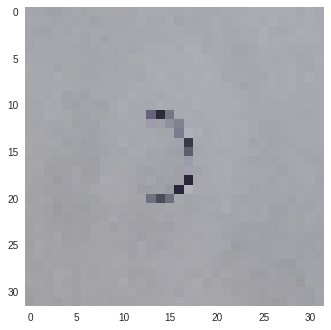

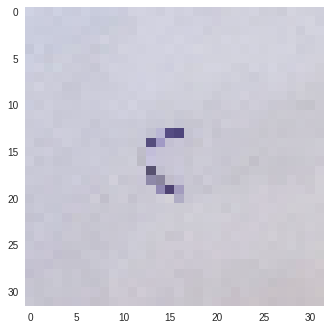

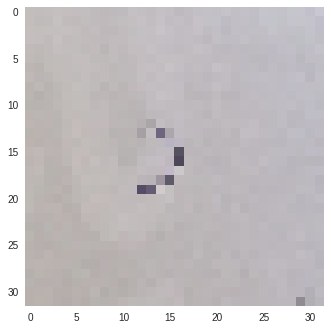

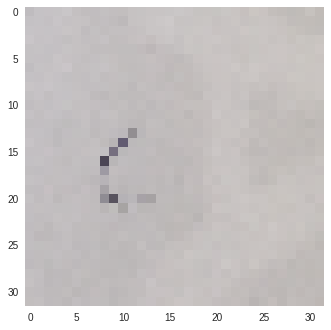

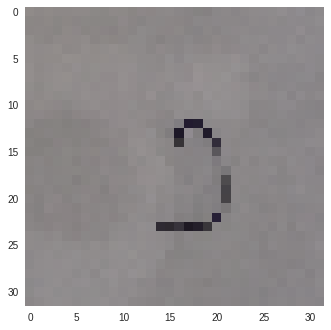

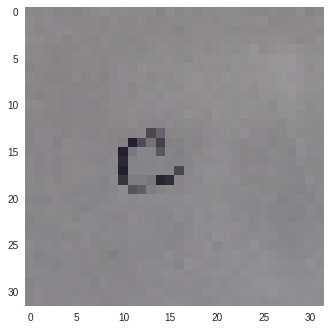

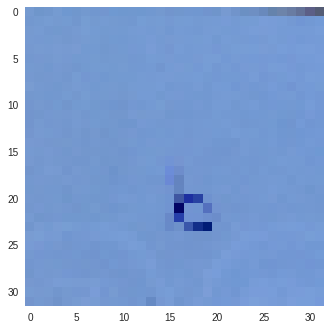

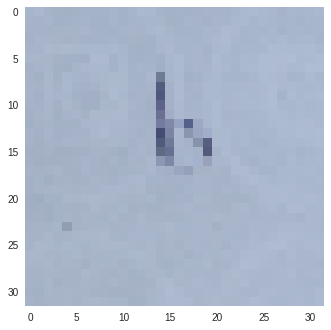

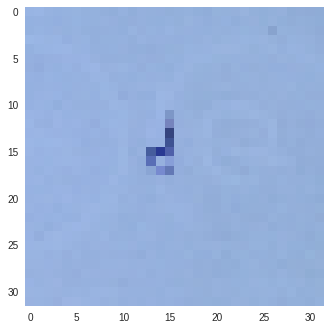

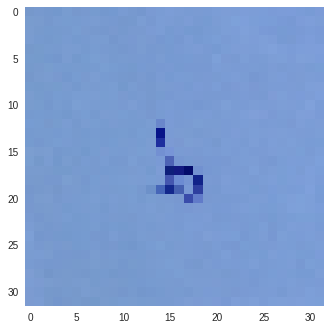

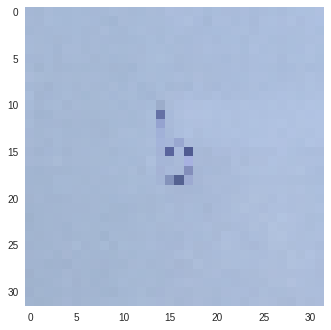

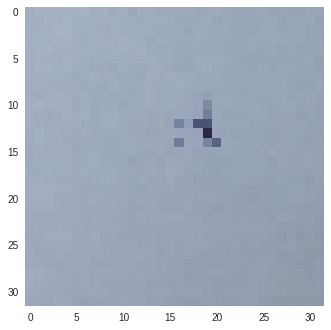

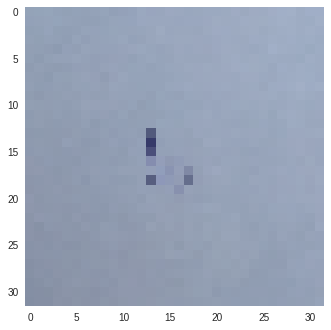

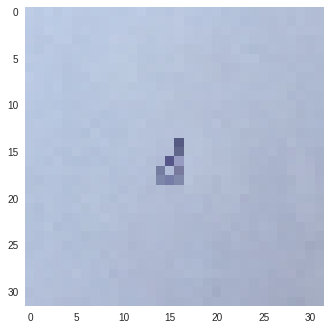

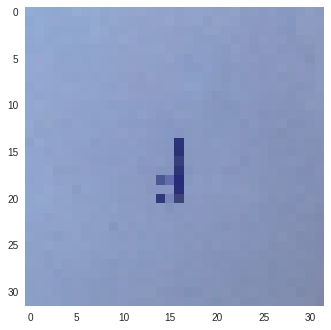

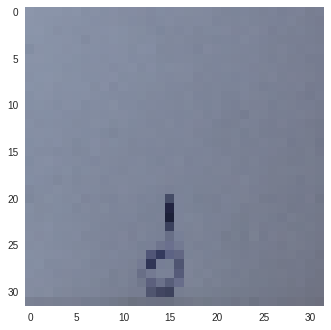

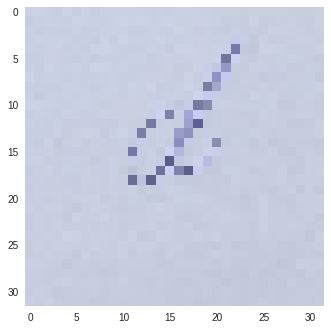

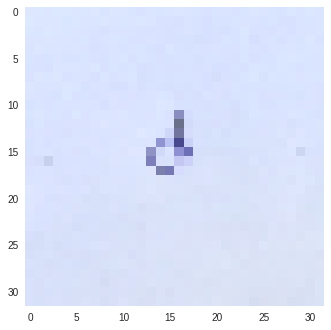

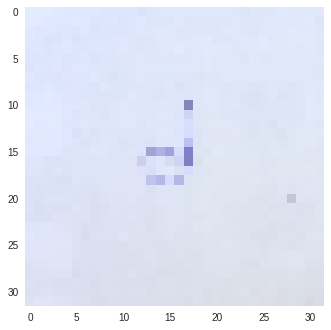

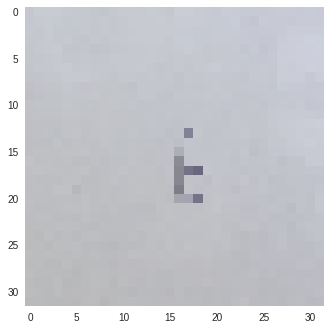

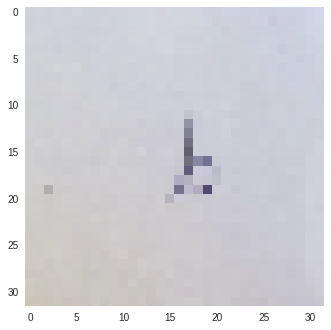

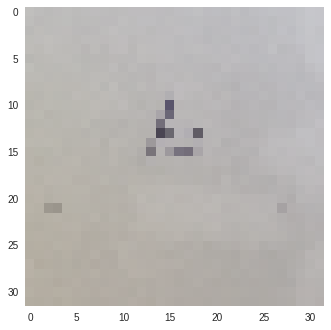

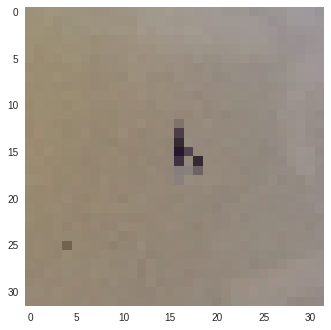

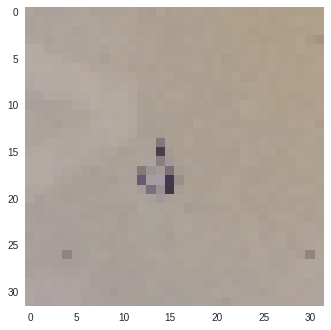

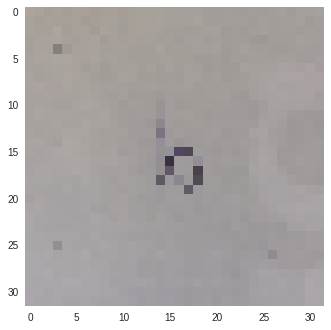

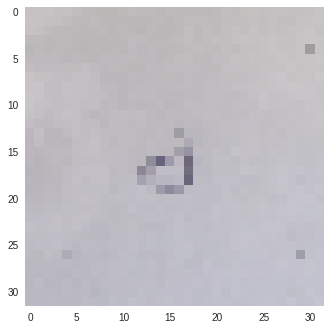

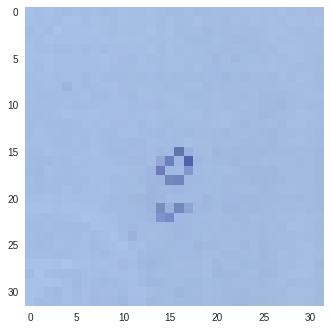

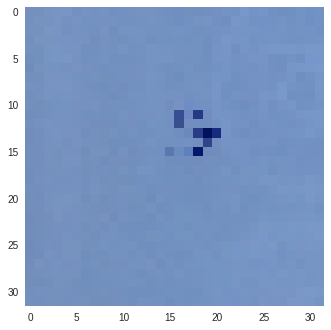

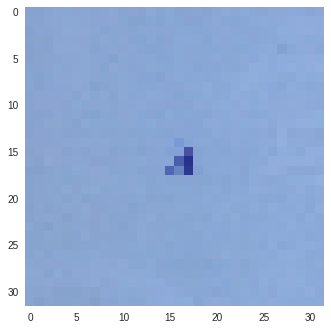

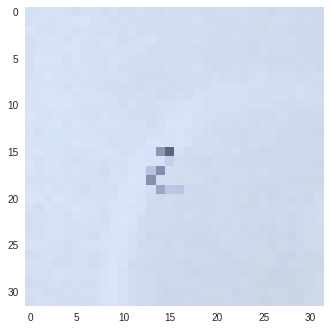

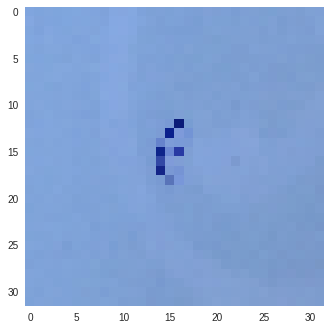

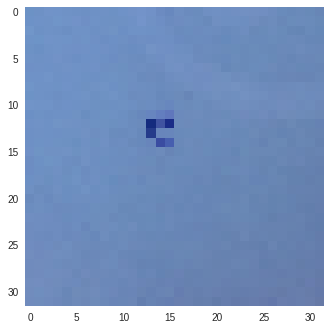

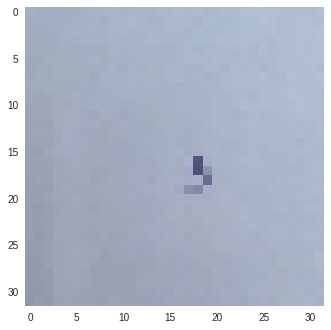

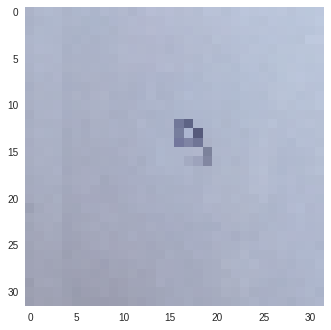

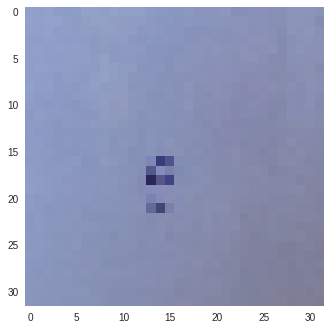

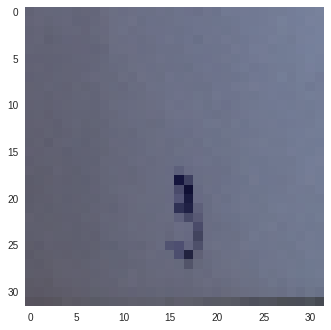

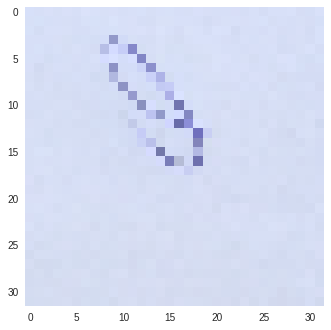

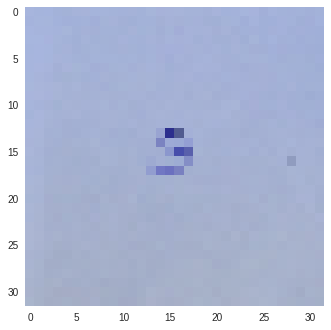

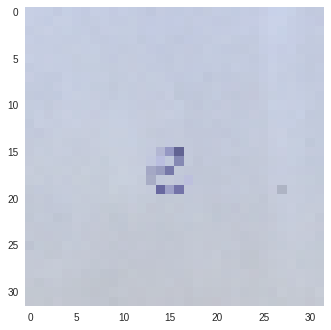

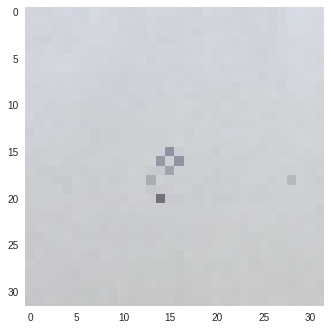

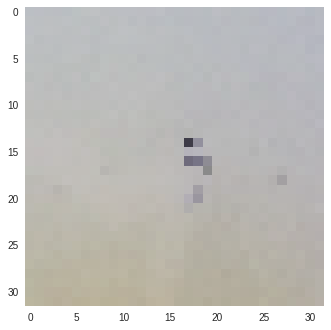

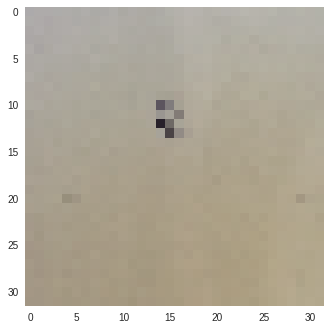

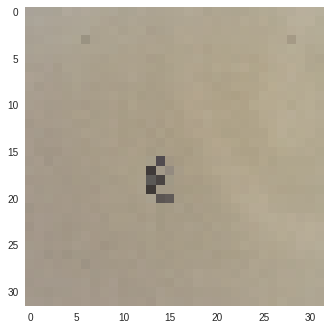

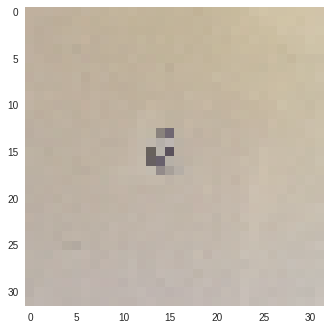

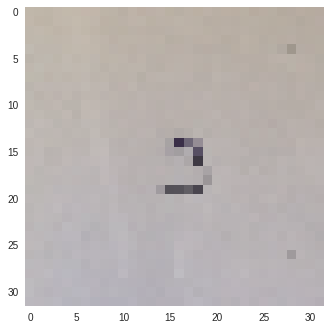

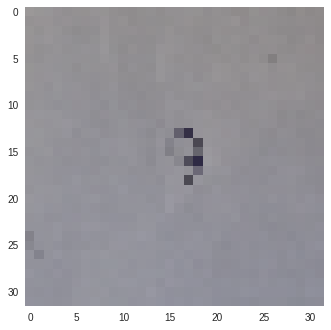

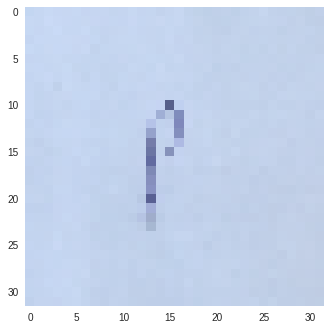

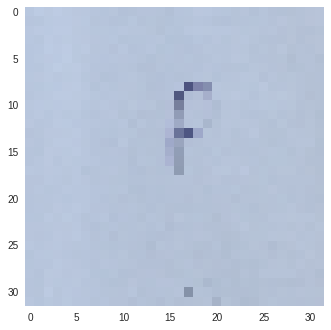

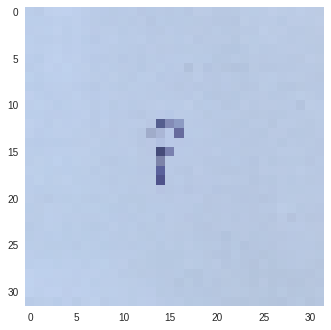

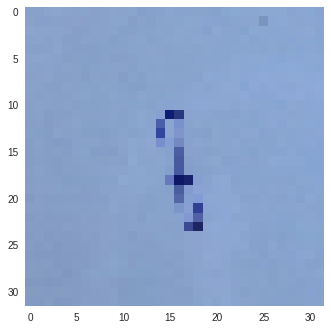

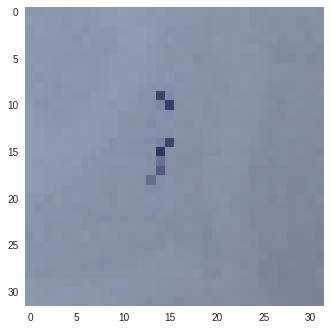

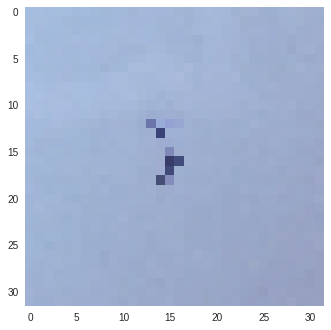

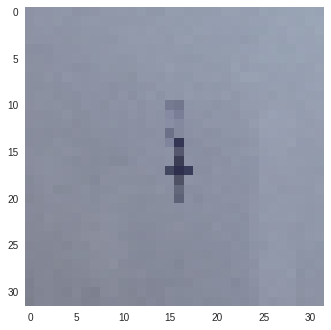

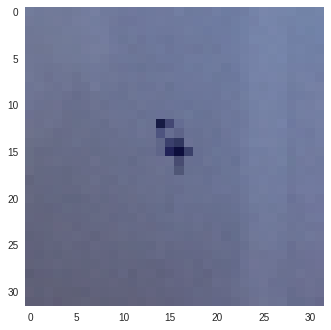

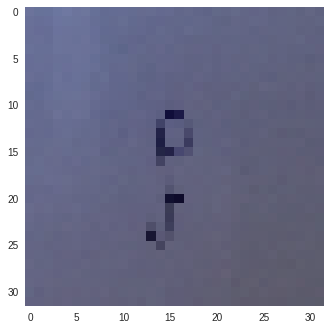

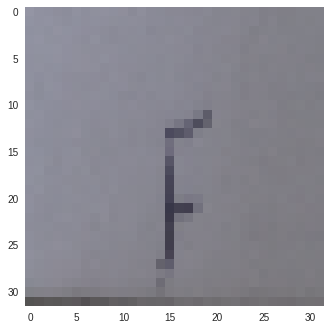

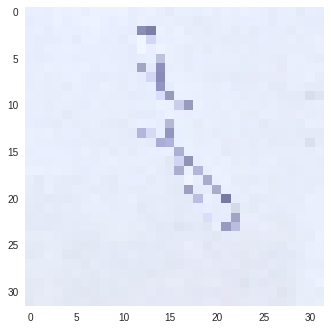

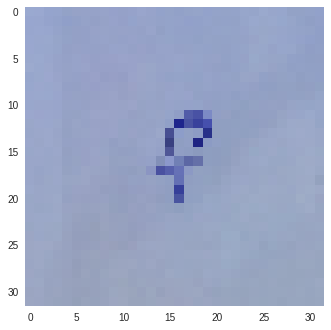

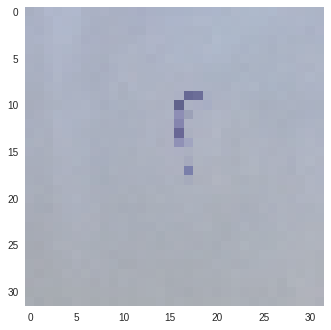

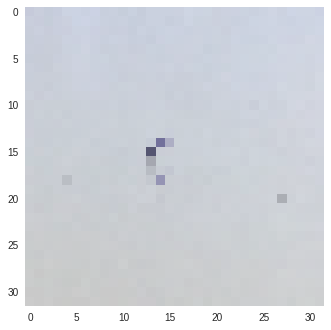

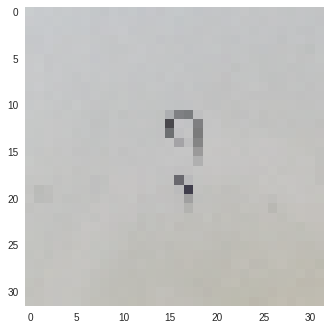

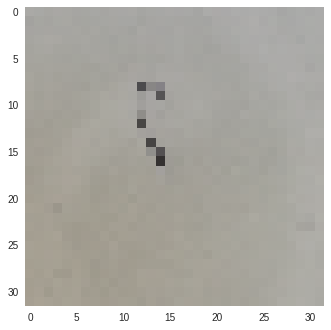

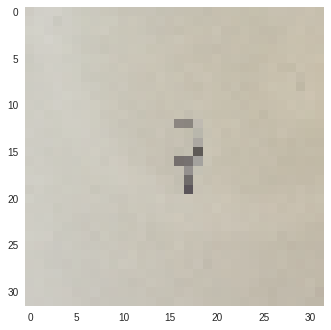

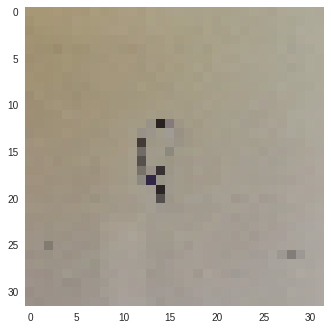

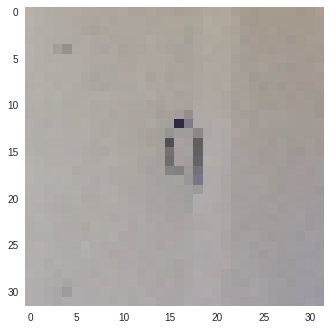

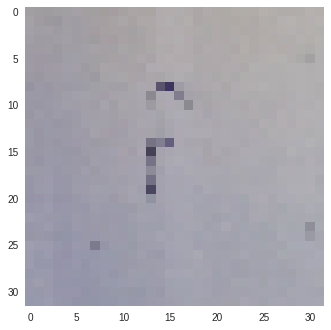

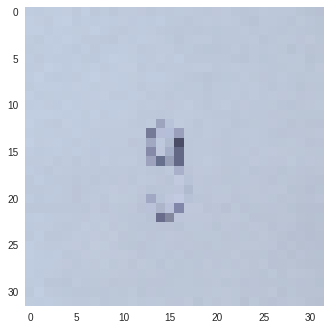

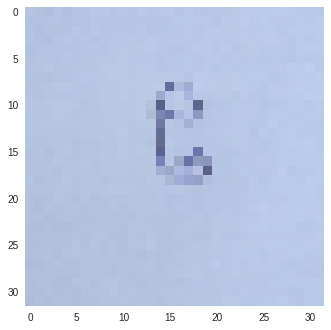

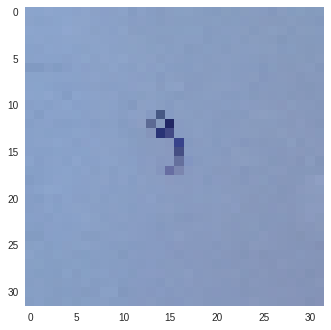

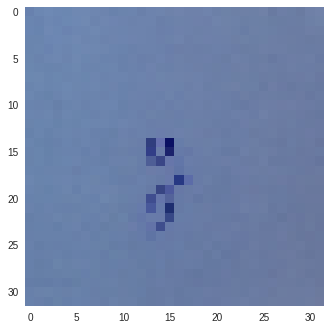

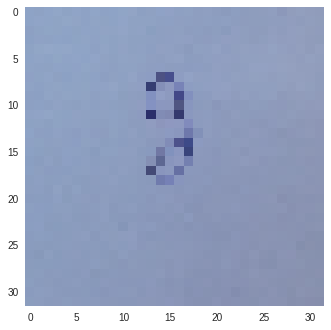

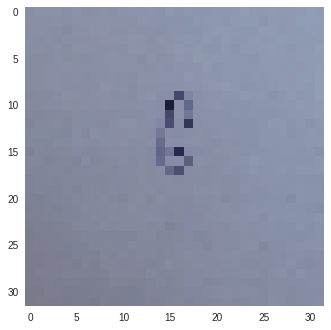

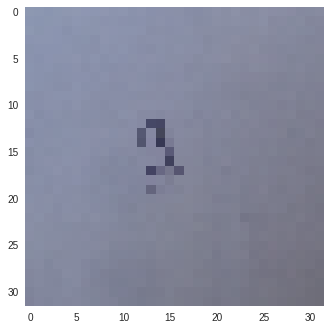

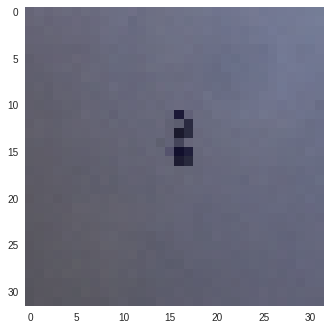

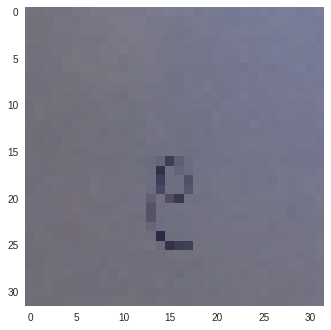

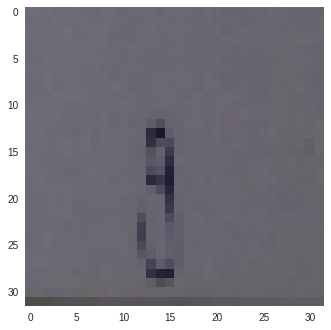

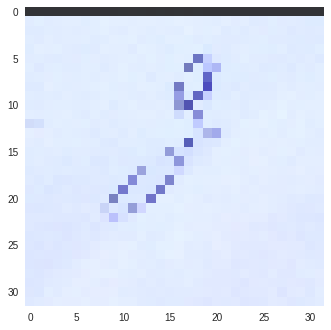

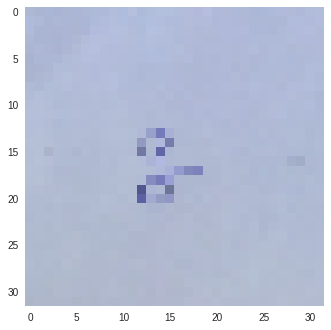

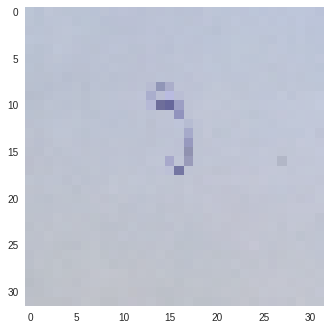

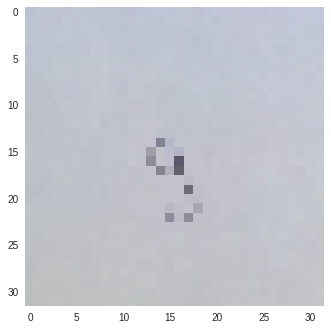

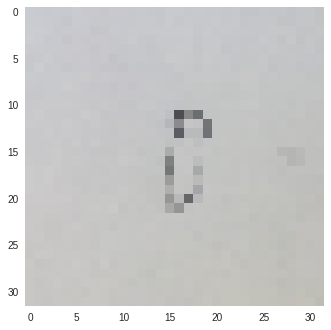

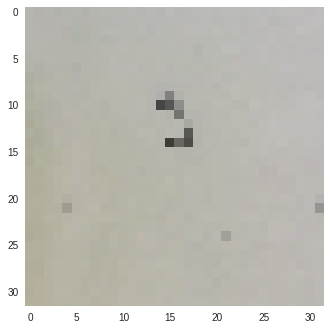

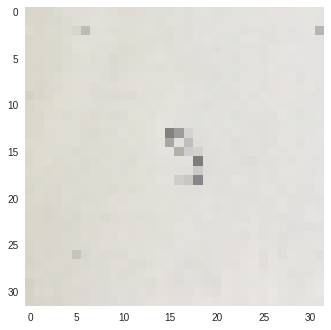

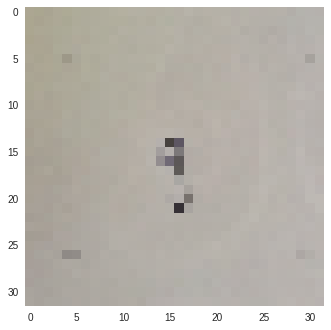

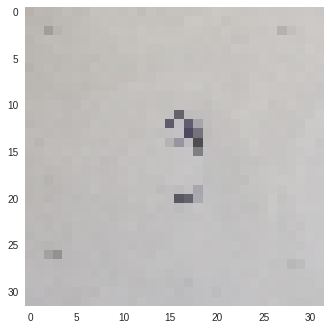

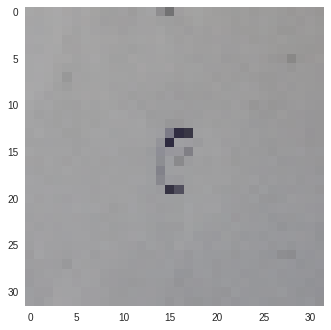

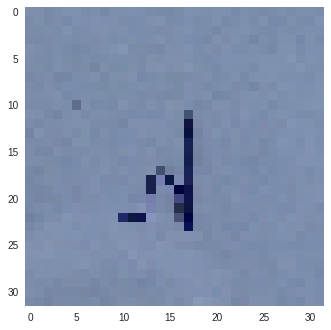

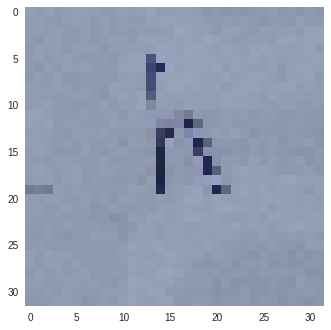

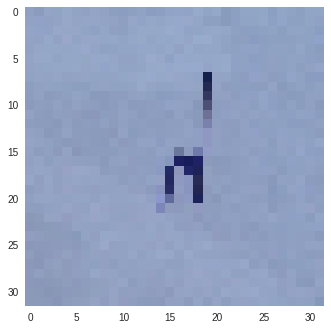

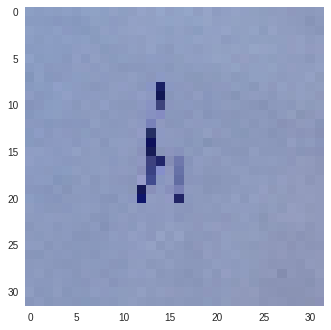

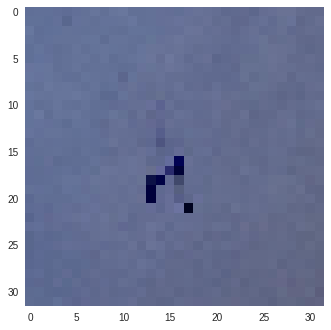

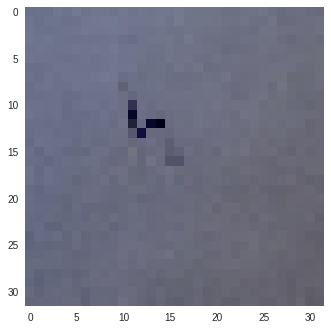

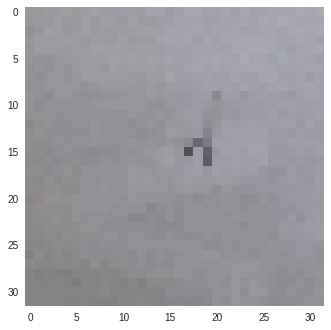

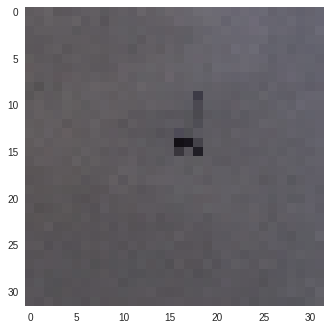

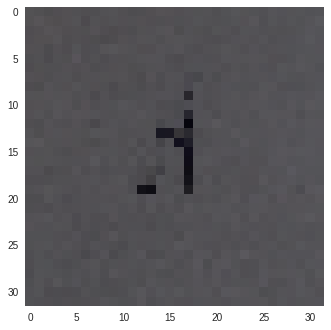

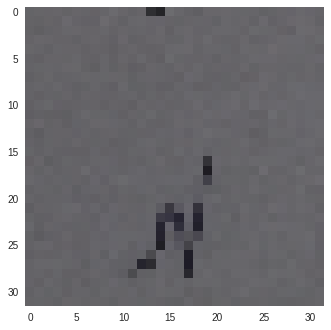

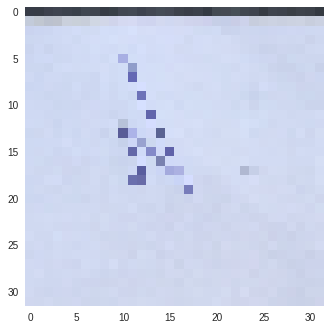

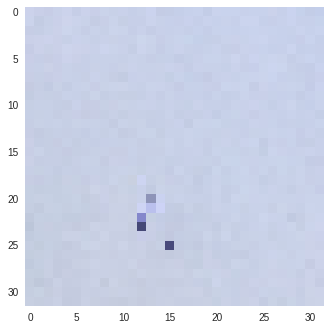

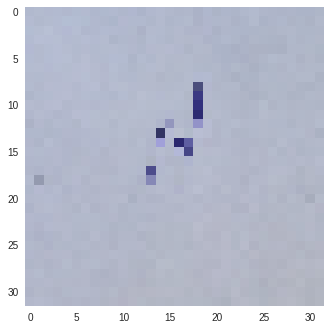

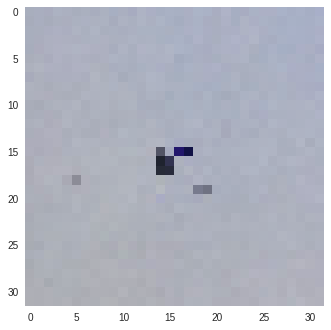

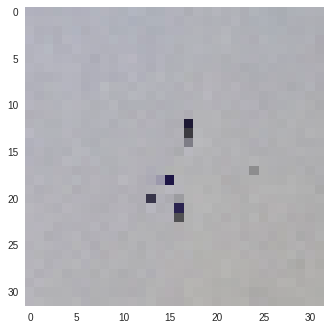

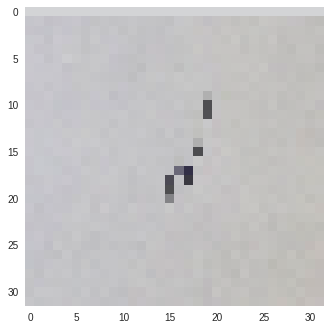

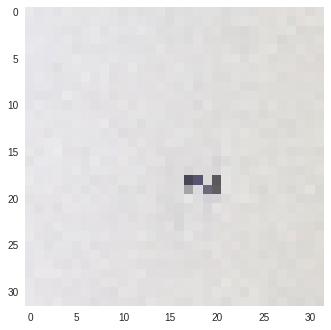

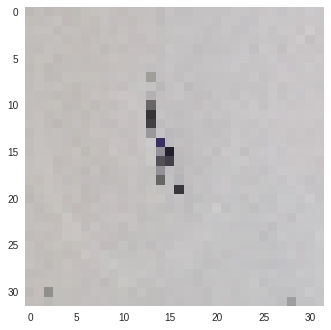

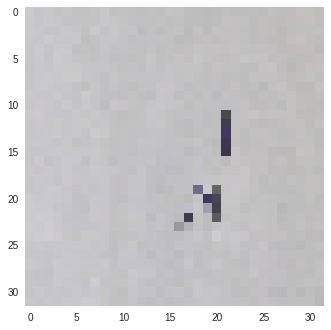

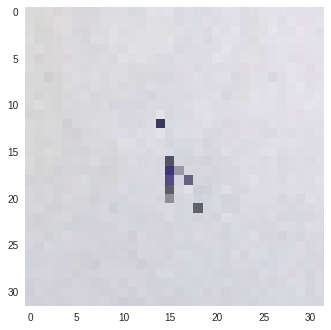

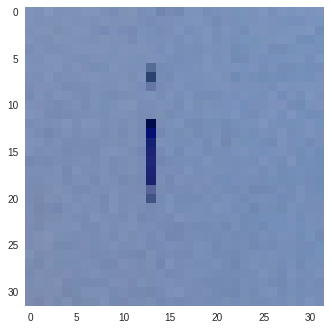

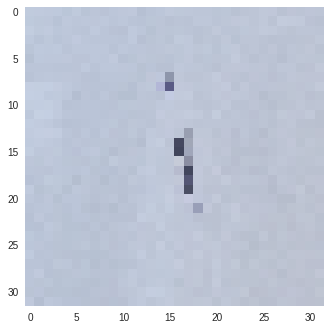

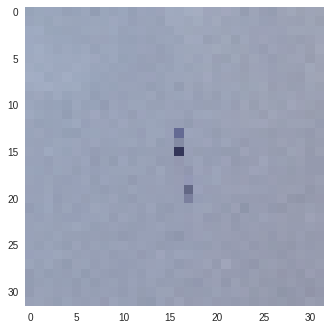

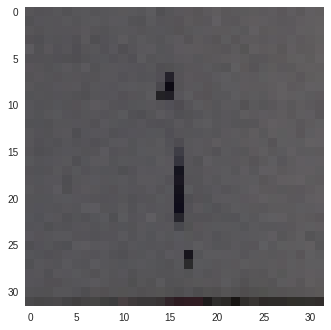

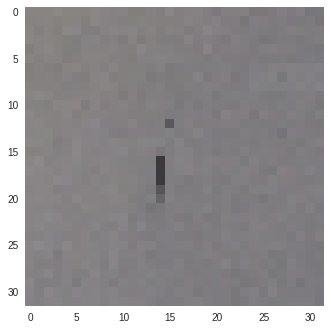

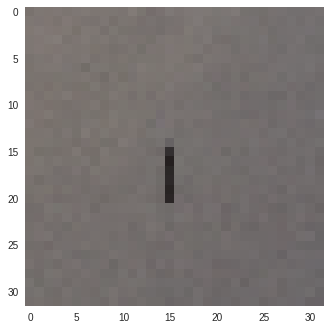

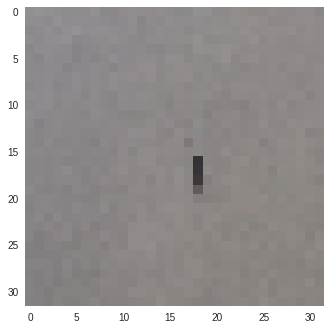

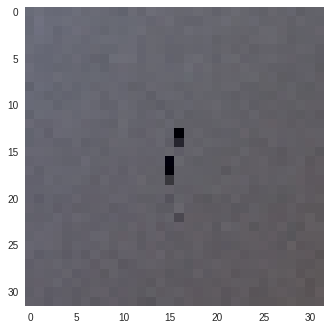

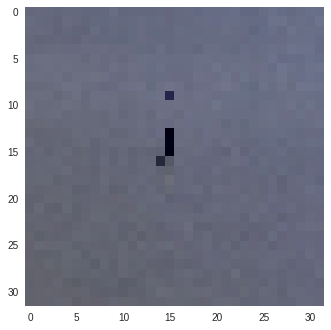

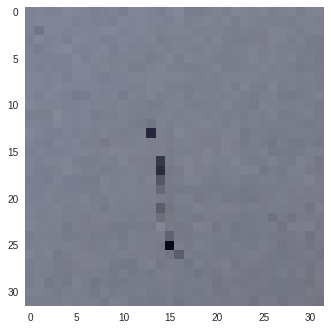

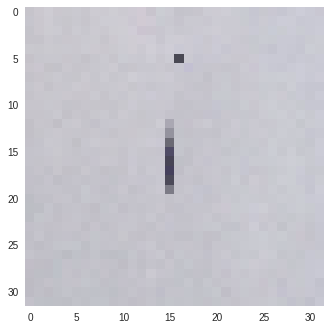

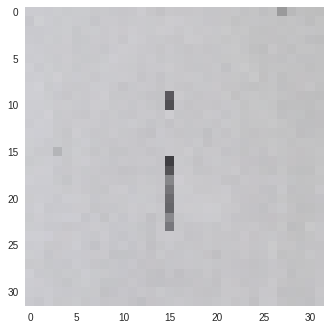

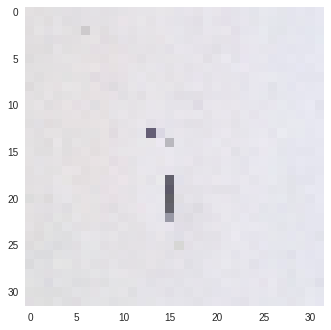

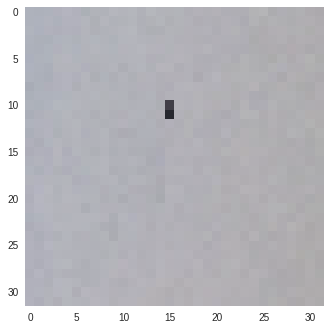

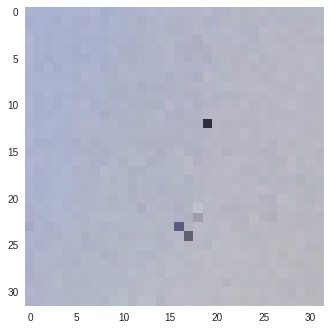

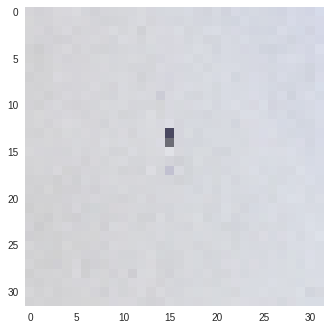

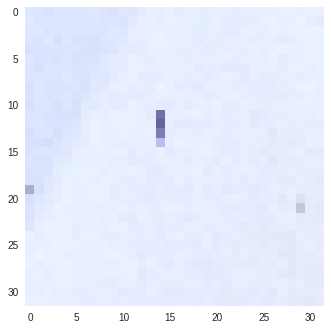

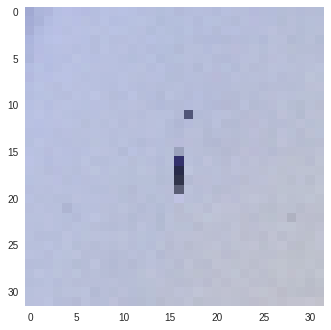

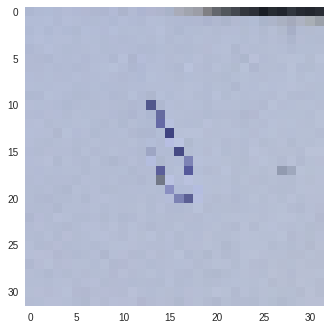

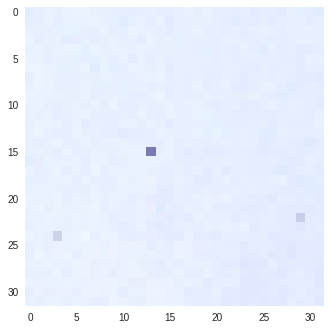

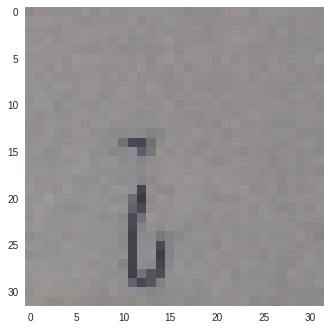

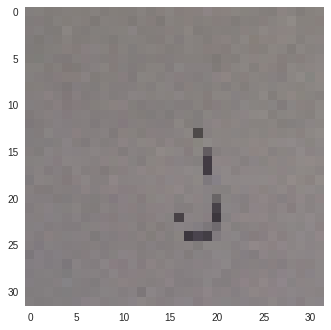

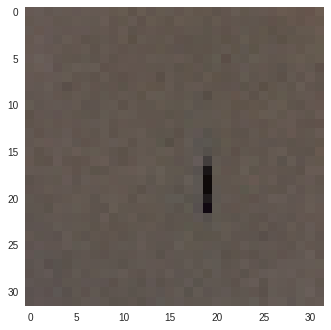

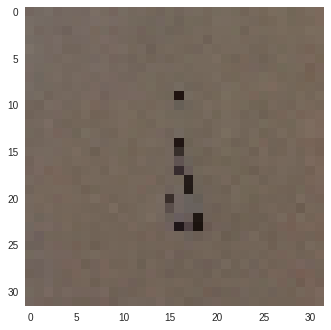

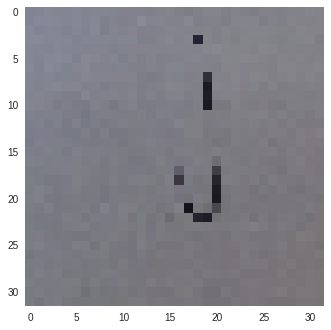

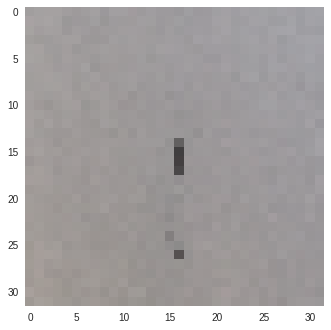

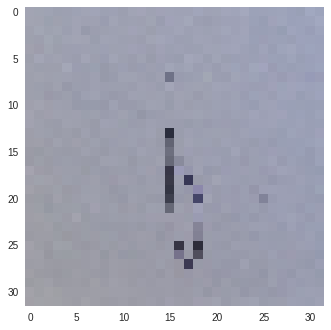

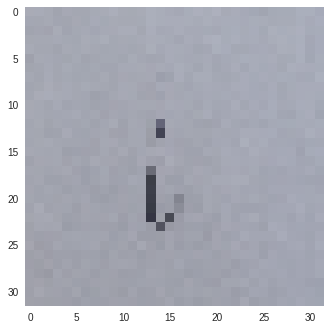

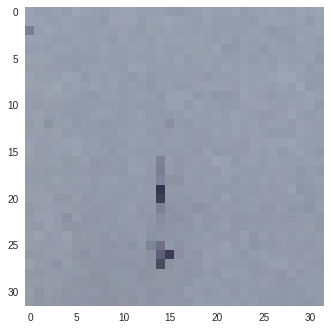

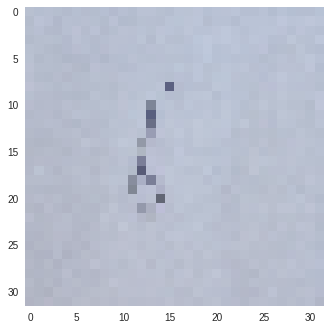

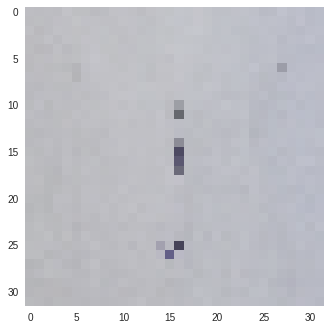

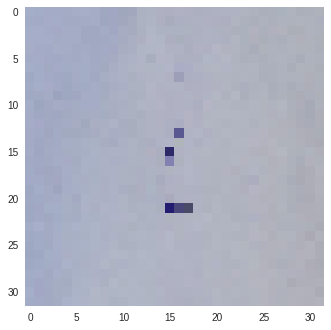

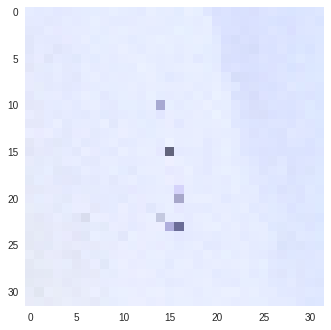

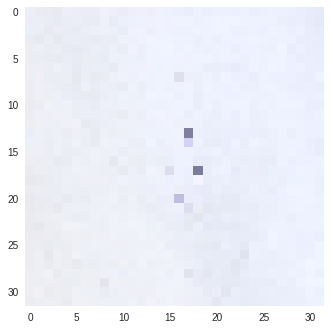

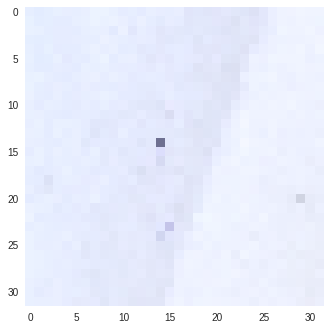

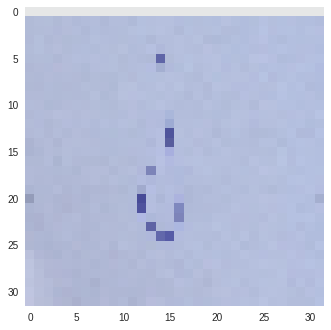

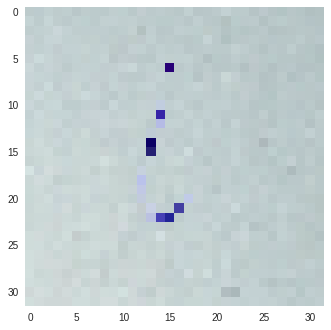

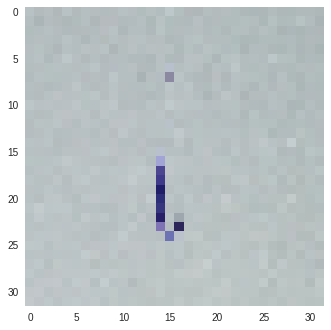

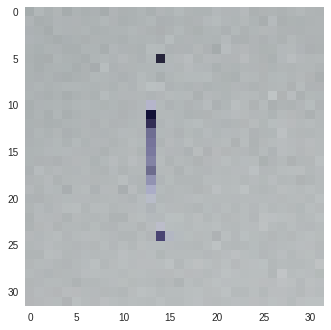

In [22]:
for i in range(199):
  plt.figure()
  plt.imshow(X[i])
  plt.grid(False)